Imports

In [3]:
# Fundamental classes
import numpy as np 
import pandas as pd 
import tensorflow as tf
import os

# Image related
import cv2
from PIL import Image

#Performance Plot
from sklearn import metrics 
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For the model and it's training
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

# Time
import time
import datetime

Functions

In [4]:
# date_time function

def date_time(x):
    if x==1:
        return 'Timestamp: {:%Y-%m-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==2:    
        return 'Timestamp: {:%Y-%b-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==3:  
        return 'Date now: %s' % datetime.datetime.now()
    if x==4:  
        return 'Date today: %s' % datetime.date.today()

In [5]:
# Performance Plot

def plot_performance(history=None, figure_directory=None, ylim_pad=[0, 0]):
    xlabel = 'Epoch'
    legends = ['Training', 'Validation']

    plt.figure(figsize=(20, 5))

    y1 = history.history['accuracy']
    y2 = history.history['val_accuracy']

    min_y = min(min(y1), min(y2))-ylim_pad[0]
    max_y = max(max(y1), max(y2))+ylim_pad[0]


    plt.subplot(121)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Accuracy\n'+date_time(1), fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()

    y1 = history.history['loss']
    y2 = history.history['val_loss']

    min_y = min(min(y1), min(y2))-ylim_pad[1]
    max_y = max(max(y1), max(y2))+ylim_pad[1]


    plt.subplot(122)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Loss\n'+date_time(1), fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()
    if figure_directory:
        plt.savefig(figure_directory+"/history")

    plt.show()

Loading Dataset (Traffic Signs Images)

In [6]:
# Setting variables for later use
data = []
labels = []
classes = 43
cur_path = os.getcwd()

# Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join("E:\DAP",'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((64,64))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

Data Splitting and conversion

In [7]:
# Checking data shape
print(data.shape, labels.shape)

# Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Displaying the shape after the split
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 64, 64, 3) (39209,)
(31367, 64, 64, 3) (7842, 64, 64, 3) (31367,) (7842,)


In [8]:
# Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.15))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.20))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(43, activation='softmax'))

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#M odel display
model.summary() 

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 60, 60, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 56, 56, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,874,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        22,059 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,319,659 (73.70 MB)

 Trainable params: 19,319,659 (73.70 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Training the Model
with tf.device('/GPU:0'):
    epochs = 10
    history1 = model.fit(X_train, y_train, batch_size=128, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 346s 1s/step - accuracy: 0.4434 - loss: 6.9690 - val_accuracy: 0.9626 - val_loss: 0.1774
Epoch 2/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 341s 1s/step - accuracy: 0.9465 - loss: 0.2000 - val_accuracy: 0.9810 - val_loss: 0.0780
Epoch 3/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 344s 1s/step - accuracy: 0.9744 - loss: 0.0864 - val_accuracy: 0.9852 - val_loss: 0.0551
Epoch 4/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 340s 1s/step - accuracy: 0.9820 - loss: 0.0620 - val_accuracy: 0.9731 - val_loss: 0.1192
Epoch 5/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 342s 1s/step - accuracy: 0.9850 - loss: 0.0515 - val_accuracy: 0.9871 - val_loss: 0.0590
Epoch 6/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 340s 1s/step - accuracy: 0.9866 - loss: 0.0473 - val_accuracy: 0.9870 - val_loss: 0.0451
Epoch 7/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 346s 1s/step - accuracy: 0.9835 - loss: 0.0615 - val_accuracy: 0.9853 - val_loss: 0.0591
Epoch 8/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 366s 1s/step - accuracy: 0.9851 - loss: 0.0528 - val_accu

Visualizing the performance of the Model during Training Phase

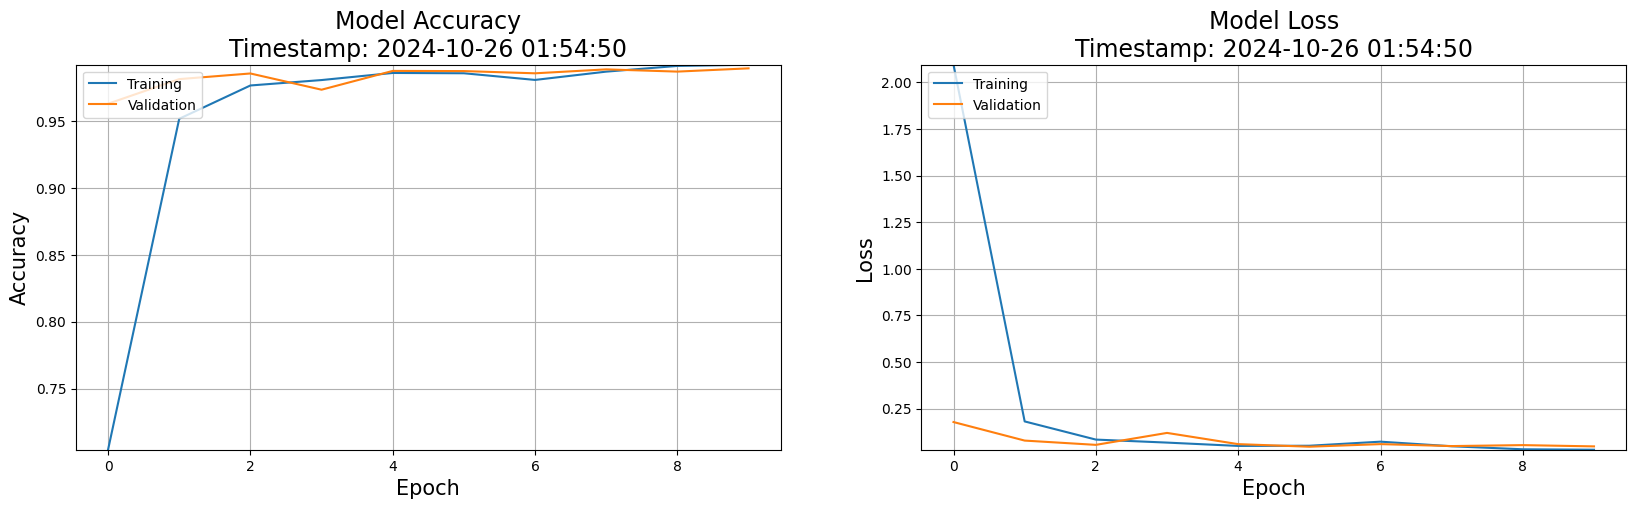

In [10]:
plot_performance(history=history1)

Loading Test Dataset and Evaluating the Model

In [ ]:
# testing accuracy o
# n test dataset
from sklearn.metrics import accuracy_score

# Importing the test dataset
y_test = pd.read_csv(r"E:\DAP\Test.csv")

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

# Retreiving the images
with tf.device('/GPU:0'):
    for img in imgs:
        image = Image.open("E:/DAP/"+img)
        image = image.resize([64,64])
        data.append(np.array(image))

X_test=np.array(data)

In [14]:
with tf.device('/GPU:0'):
    pred = np.argmax(model.predict(X_test), axis=-1)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

395/395 ━━━━━━━━━━━━━━━━━━━━ 33s 82ms/step
0.9505938242280285


In [15]:
# Saving the Model 
model.save('traffic_classifier333.h5')

In [16]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model(r"E:\DAP\traffic_classifier333.h5")


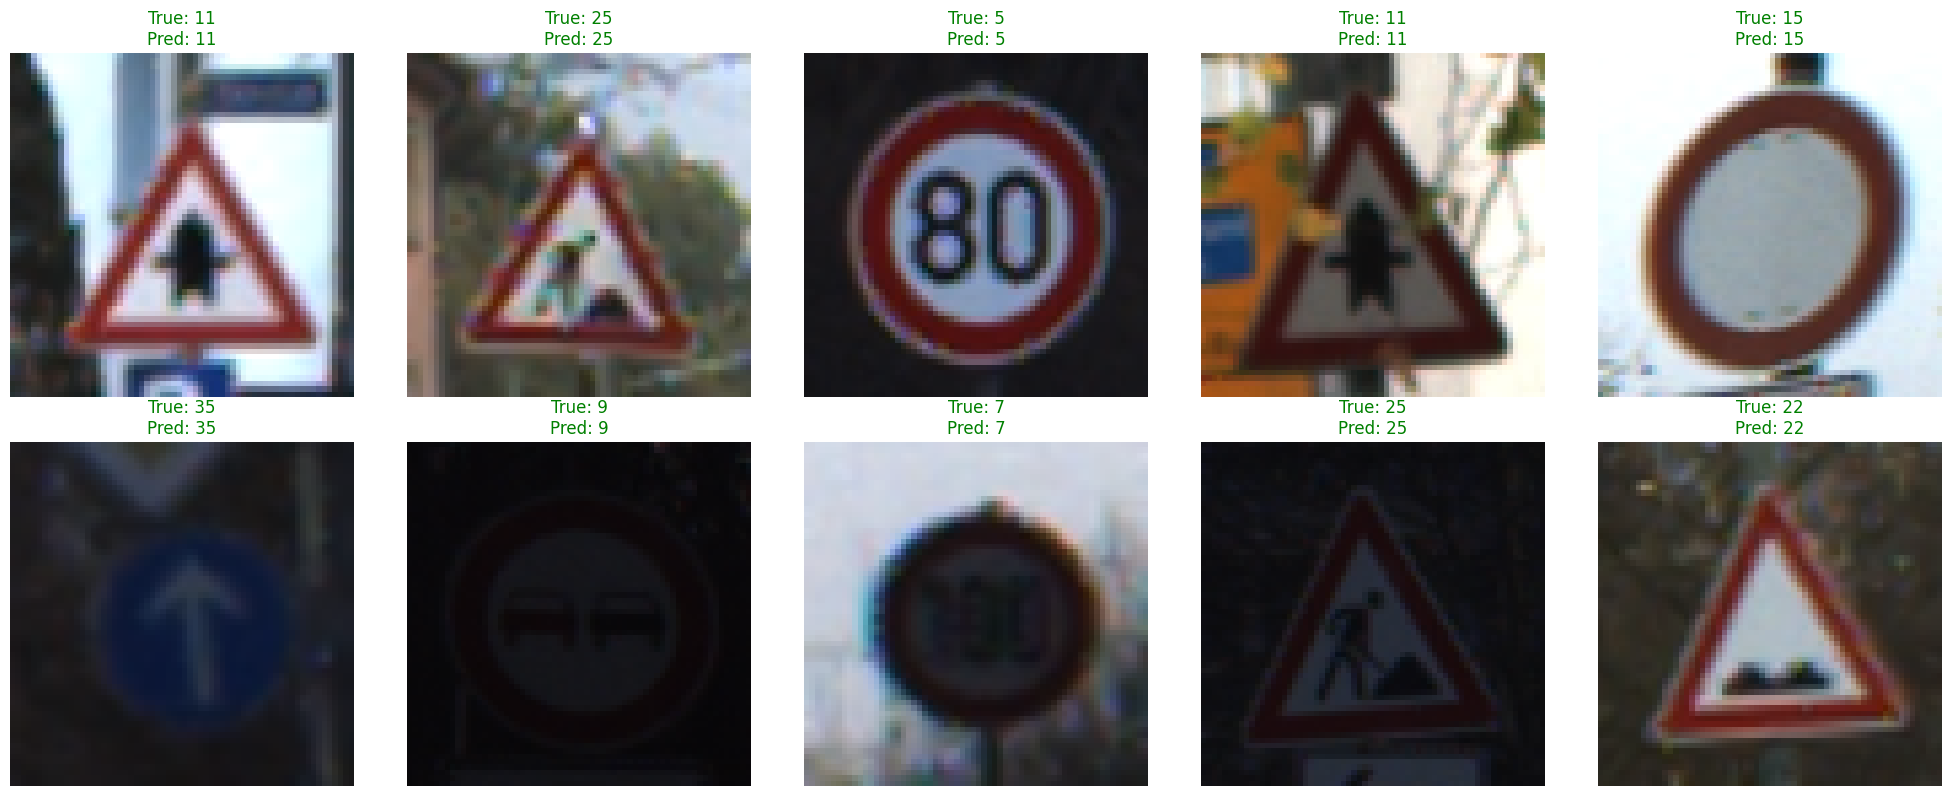

In [18]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import random

def load_and_predict_images(csv_file, num_samples=10):
    # Read CSV file
    df = pd.read_csv(csv_file)
    
    # Randomly select num_samples rows
    sample_rows = df.sample(n=num_samples)
    
    plt.figure(figsize=(20, 8))
    
    for idx, (_, row) in enumerate(sample_rows.iterrows()):
        try:
            # Load and preprocess image
            image_path = row['Path']
            img = Image.open(image_path)
            img = img.resize((64,64))
            
            # Prepare image for prediction
            img_array = np.array(img)
            input_img = img_array.reshape(1, 64, 64, 3)
            
            # Make prediction
            with tf.device('/GPU:0'):
                prediction = np.argmax(model.predict(input_img, verbose=0), axis=-1)[0]
            
            # Plot image
            plt.subplot(2, 5, idx + 1)
            plt.imshow(img_array)
            
            # Set title color based on prediction correctness
            title_color = 'green' if prediction == row['ClassId'] else 'red'
            plt.title(f'True: {row["ClassId"]}\nPred: {prediction}', 
                     color=title_color)
            plt.axis('off')
            
        except Exception as e:
            print(f"Error processing image {image_path}: {e}")
    
    plt.tight_layout()
    plt.show()

# Example usage
csv_file = r"E:\DAP/Test.csv"  
load_and_predict_images(csv_file, num_samples=10)